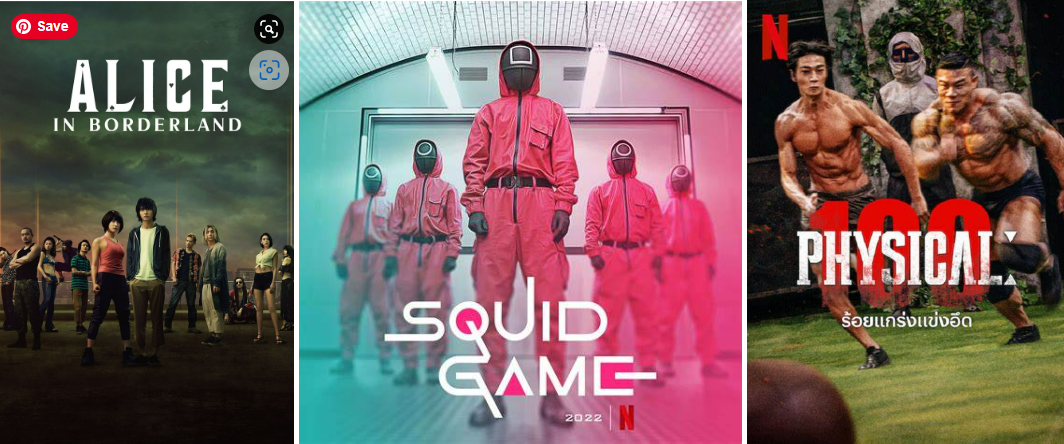

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding,GlobalMaxPooling1D, SpatialDropout1D,GRU
import nltk
import re
from nltk.stem import PorterStemmer
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
# download lexicon
nltk.download('vader_lexicon')
sia = SIA()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_alic=pd.read_csv('/content/aliceborderland.csv')
df_phy=pd.read_csv('/content/physical100.csv')
df_squaid=pd.read_csv('/content/squidgame.csv')

In [ ]:
df_alic.head()


,headlines
0,"King Of Hearts Rules, my interpretation"
1,Alice in Borderland/Chishiya themed phone beca...
2,What would a Alice in Borderland videogame loo...
3,arisu
4,Alice in Borderland: The Cycle Continues part ...


In [ ]:
df_phy.head()

,headlines
0,Dumb question about Sexyama’s hair
1,Sand match idea
2,When do new episodes release?
3,Physical 100 Drinking Game
4,"it was very short, but he makes me very happy"


In [ ]:
df_squaid.head()

,headlines
0,Gi Hun’s actor Lee Jung-jae becoming a Directo...
1,Addressing the detectives phone battery
2,[Identify] What brand makes this grey bomber j...
3,about the food they gave at the players
4,Just watched tonight's Emmy acceptance speeche...


In [ ]:
result=[]
def get_sentiment_score(df):
  for line in df['headlines']:
    sentiment_scores=sia.polarity_scores(line)
    sentiment_scores['headline']=line
    result.append(sentiment_scores)

In [ ]:
get_sentiment_score(df_alic)


In [ ]:
result

[{'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'King Of Hearts Rules, my interpretation'},
 {'neg': 0.115,
  'neu': 0.71,
  'pos': 0.175,
  'compound': 0.2732,
  'headline': 'Alice in Borderland/Chishiya themed phone because I got bored a while ago :] (includes some manga panels)'},
 {'neg': 0.0,
  'neu': 0.737,
  'pos': 0.263,
  'compound': 0.3612,
  'headline': 'What would a Alice in Borderland videogame look like?'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'arisu'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Alice in Borderland: The Cycle Continues part 2 is fully published!'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Just what kind of game was the Queen of Diamonds?'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': '❤️❤️❤️ Chishiya ❤️🍑❤️'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Did the King of Sp

In [ ]:
alice_score=pd.DataFrame(result)
alice_score.head(10)

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,"King Of Hearts Rules, my interpretation"
1,0.115,0.710,0.175,0.2732,Alice in Borderland/Chishiya themed phone beca...
2,0.000,0.737,0.263,0.3612,What would a Alice in Borderland videogame loo...
3,0.000,1.000,0.000,0.0000,arisu
4,0.000,1.000,0.000,0.0000,Alice in Borderland: The Cycle Continues part ...
5,0.000,1.000,0.000,0.0000,Just what kind of game was the Queen of Diamonds?
6,0.000,1.000,0.000,0.0000,❤️❤️❤️ Chishiya ❤️🍑❤️
7,0.000,1.000,0.000,0.0000,Did the King of Spades have some citizens work...
8,0.000,1.000,0.000,0.0000,J♥️
9,0.000,1.000,0.000,0.0000,2♣️ - Borrowed Time


In [ ]:
alice_score.tail(100)

,neg,neu,pos,compound,headline
894,0.000,1.000,0.000,0.0000,How time moves in the Borderlands
895,0.000,0.833,0.167,0.4939,what happens if u choose to stay in the border...
896,0.000,1.000,0.000,0.0000,A Series on the Citizens?
897,0.000,1.000,0.000,0.0000,Replenishment station button and phone
898,0.445,0.555,0.000,-0.5870,[S2:E7] Kings of Spades Fight - I AM NOT OKAY
...,...,...,...,...,...
989,0.750,0.250,0.000,-0.4588,Ep 7 Sucked
990,0.000,1.000,0.000,0.0000,Alice in Borderland Season 2 eps 1 & 2 podcast!
991,0.000,1.000,0.000,0.0000,(almost) the whole gang is here!
992,0.000,1.000,0.000,0.0000,Looking to buy Chishiya S02 Jacket


In [ ]:
alice_score.describe()

,neg,neu,pos,compound
count,994.000000,994.000000,994.000000,994.000000
mean,0.046913,0.878870,0.071202,0.046747
std,0.132142,0.196092,0.150213,0.267883
min,0.000000,0.000000,0.000000,-0.867000
25%,0.000000,0.769000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.960700


In [ ]:
def result_labl(df):
  df['label']=0
  df.loc[df['compound']>=0.05,'label']=1
  df.loc[df['compound']<=-0.05,'label']=-1
  return df
result_labl(alice_score)

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,"King Of Hearts Rules, my interpretation",0
1,0.115,0.710,0.175,0.2732,Alice in Borderland/Chishiya themed phone beca...,1
2,0.000,0.737,0.263,0.3612,What would a Alice in Borderland videogame loo...,1
3,0.000,1.000,0.000,0.0000,arisu,0
4,0.000,1.000,0.000,0.0000,Alice in Borderland: The Cycle Continues part ...,0
...,...,...,...,...,...,...
989,0.750,0.250,0.000,-0.4588,Ep 7 Sucked,-1
990,0.000,1.000,0.000,0.0000,Alice in Borderland Season 2 eps 1 & 2 podcast!,0
991,0.000,1.000,0.000,0.0000,(almost) the whole gang is here!,0
992,0.000,1.000,0.000,0.0000,Looking to buy Chishiya S02 Jacket,0


<ipython-input-16-e093e6dffbb7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["negative", "neutral", "positive"])


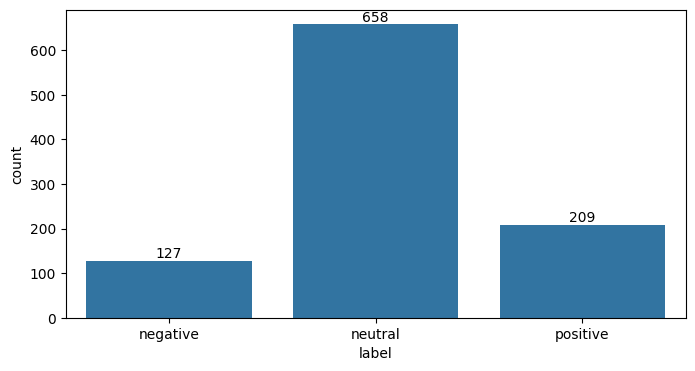

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax = sns.countplot(x='label', data=alice_score)

ax.set_xticklabels(["negative", "neutral", "positive"])

ax.bar_label(ax.containers[0])

plt.show()


In [ ]:
result=[]
get_sentiment_score(df_phy)
phy_score=result_labl(pd.DataFrame(result))
phy_score.head()

,neg,neu,pos,compound,headline,label
0,0.452,0.548,0.000,-0.5106,Dumb question about Sexyama’s hair,-1
1,0.000,1.000,0.000,0.0000,Sand match idea,0
2,0.000,1.000,0.000,0.0000,When do new episodes release?,0
3,0.000,1.000,0.000,0.0000,Physical 100 Drinking Game,0
4,0.000,0.621,0.379,0.7572,"it was very short, but he makes me very happy",1


<ipython-input-18-2f667cd0f0fe>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["negative", "neutral", "positive"])


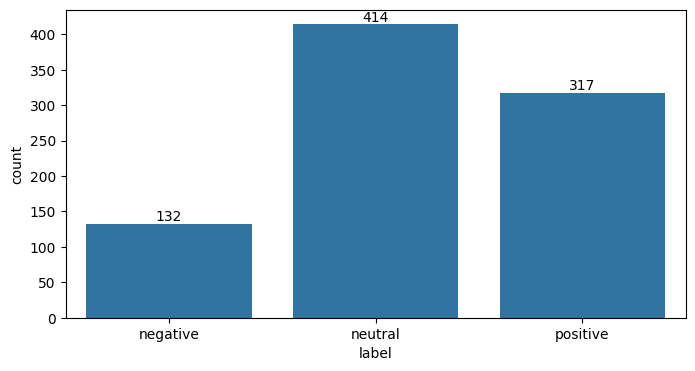

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax = sns.countplot(x='label', data=phy_score)

ax.set_xticklabels(["negative", "neutral", "positive"])

ax.bar_label(ax.containers[0])

plt.show()


In [ ]:
result=[]
get_sentiment_score(df_squaid)
squaid_score=result_labl(pd.DataFrame(result))
squaid_score.head()

,neg,neu,pos,compound,headline,label
0,0.00,1.000,0.000,0.0000,Gi Hun’s actor Lee Jung-jae becoming a Directo...,0
1,0.00,1.000,0.000,0.0000,Addressing the detectives phone battery,0
2,0.28,0.623,0.097,-0.5175,[Identify] What brand makes this grey bomber j...,-1
3,0.00,1.000,0.000,0.0000,about the food they gave at the players,0
4,0.00,0.786,0.214,0.4588,Just watched tonight's Emmy acceptance speeche...,1


<ipython-input-20-43902480f5bc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["negative", "neutral", "positive"])


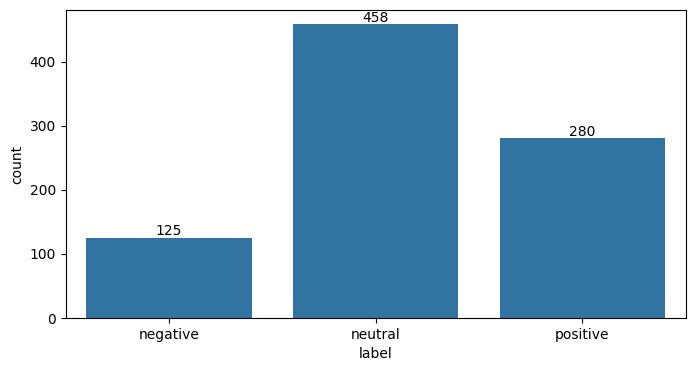

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax = sns.countplot(x='label', data=squaid_score)

ax.set_xticklabels(["negative", "neutral", "positive"])

ax.bar_label(ax.containers[0])

plt.show()


<ipython-input-21-5bca47585461>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["negative", "neutral", "positive"])
<ipython-input-21-5bca47585461>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["negative", "neutral", "positive"])
<ipython-input-21-5bca47585461>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(["negative", "neutral", "positive"])


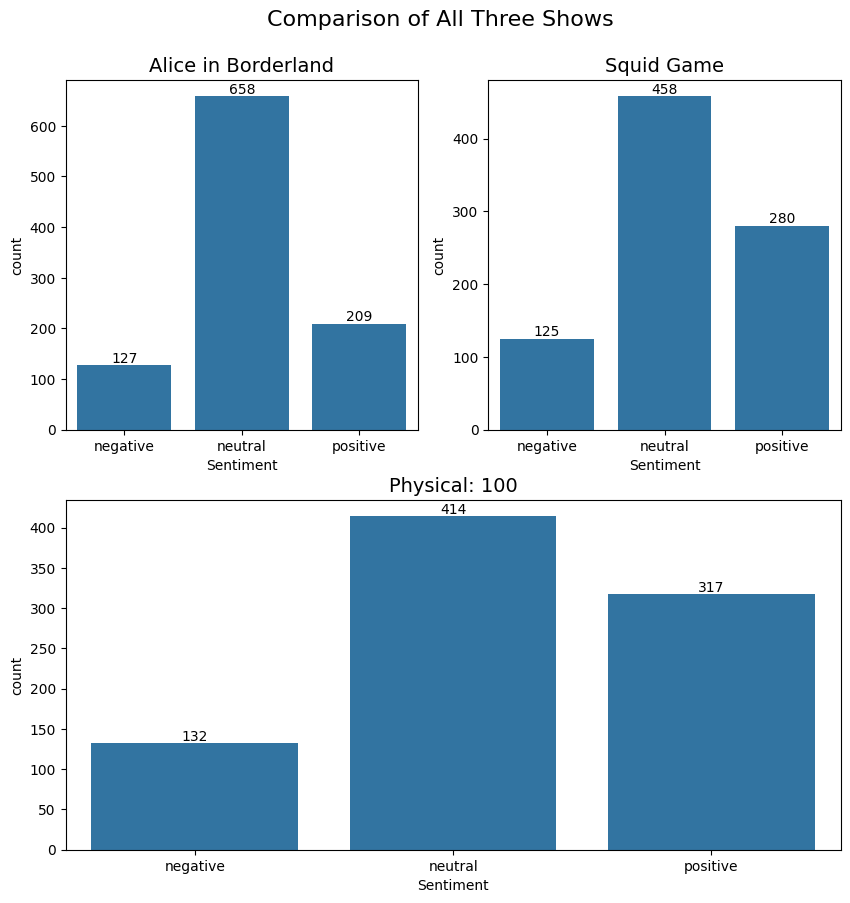

In [ ]:
# Create a figure with two subplots
fig = plt.figure(figsize=(10,10))

# Add subplots with specified position and size (in fractions of figure width and height)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

# Plot the first countplot (alice in borderland) on the first axis
sns.countplot(x=alice_score.label, ax=ax1)
ax1.set_xticklabels(["negative", "neutral", "positive"])
ax1.set_xlabel("Sentiment")
ax1.bar_label(ax1.containers[0])
ax1.set_title("Alice in Borderland", fontsize=14)

# Plot the second countplot (squidgame) on the second axis
sns.countplot(x=squaid_score.label, ax=ax2)
ax2.set_xticklabels(["negative", "neutral", "positive"])
ax2.set_xlabel("Sentiment")
ax2.bar_label(ax2.containers[0])
ax2.set_title("Squid Game", fontsize=14)

# Plot the second countplot (squidgame) on the second axis
sns.countplot(x=phy_score.label, ax=ax3)
ax3.set_xticklabels(["negative", "neutral", "positive"])
ax3.set_xlabel("Sentiment")
ax3.bar_label(ax3.containers[0])
ax3.set_title("Physical: 100", fontsize=14)

# title of plot
fig.suptitle("Comparison of All Three Shows", fontsize=16, y=0.95)

# Show the plot
plt.show()

In [ ]:
squaid_score['show_title']='squidgame'
alice_score['show_title']='aliceinborderland'
phy_score['show_title']='physical100'

In [ ]:
df=pd.concat([squaid_score,alice_score,phy_score])
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,neg,neu,pos,compound,headline,label,show_title
0,0.531,0.469,0.000,-0.5267,This show is stupid,-1,physical100
1,0.000,1.000,0.000,0.0000,Subplot in Squidgame,0,squidgame
2,0.000,0.806,0.194,0.6478,The aim of the show should change to finding t...,1,physical100
3,0.000,1.000,0.000,0.0000,Jang Seongmin (rugby dude) in HDYP EP.108 [ENG],0,physical100
4,0.000,1.000,0.000,0.0000,Squid game,0,squidgame


In [ ]:
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words') # Download the 'words' dataset from NLTK
from nltk.corpus import words
english_words = set(words.words())
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords # Import the stopwords module
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer # Import the PorterStemmer module
stemmer = PorterStemmer()
import string
punctuations = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
new_stopwords = ["game", "spoiler", "spoilers"]
stop_words.update(new_stopwords)
new_stopwords_list = set(stop_words)

In [ ]:
def get_stem(headline):
  headline = headline.lower()
  headline = headline.strip(punctuations)
  headline = re.sub('[0-9]+|<|\(|\<|\:|\?', '', headline)
  words=[]
  words=word_tokenize(headline)
  words = [word for word in words if word not in stop_words]
  words = [word for word in words if word in english_words]
  words = [stemmer.stem(word) for word in words]
  return ' '.join(words)

In [ ]:

def preprocessing_lemma(headline):
    #convert headline to lower case
    headline = headline.lower()
    #remove punctuation marks from headline
    headline = headline.strip(punctuations)
    #remove numericals
    headline = re.sub('[0-9]+|<|\(|\<|\:|\?', '', headline)
    #tokenize the headline
    words = []
    words = word_tokenize(headline)
    #remove stopwords from words
    words = [word for word in words if word not in stop_words]
    #stem each word
    words = [lemmatizer.lemmatize(word) for word in words]
    #join lemmatized words into clean text_lemma
    clean_text_lemma = " ".join(words)

    return clean_text_lemma

#apply function to headlines column and assign it to cleaned_text_stemmer column


In [ ]:
df['cleaned_text_stemmer'] = df['headline'].apply(get_stem)
df['cleaned_text_lemma'] = df['headline'].apply(preprocessing_lemma)


In [ ]:
df.head()

,neg,neu,pos,compound,headline,label,show_title,cleaned_text_stemmer,cleaned_text_lemma
0,0.531,0.469,0.000,-0.5267,This show is stupid,-1,physical100,show stupid,show stupid
1,0.000,1.000,0.000,0.0000,Subplot in Squidgame,0,squidgame,subplot,subplot squidgame
2,0.000,0.806,0.194,0.6478,The aim of the show should change to finding t...,1,physical100,aim show chang find perfect mind see almost fi...,"aim show change finding perfect mind , seeing ..."
3,0.000,1.000,0.000,0.0000,Jang Seongmin (rugby dude) in HDYP EP.108 [ENG],0,physical100,dude,jang seongmin rugby dude ) hdyp ep . [ eng
4,0.000,1.000,0.000,0.0000,Squid game,0,squidgame,squid,squid


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
x=df['cleaned_text_stemmer']
y=df['show_title']

In [ ]:
print(x)
print("x"*30)
print( y)

0                                             show stupid
1                                                 subplot
2       aim show chang find perfect mind see almost fi...
3                                                    dude
4                                                   squid
                              ...                        
2715    think miss behind chapter random unnecessari s...
2716                               quest order best worst
2717                                          survey race
2718                                                  cha
2719                                            step poll
Name: cleaned_text_stemmer, Length: 2720, dtype: object
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0             physical100
1               squidgame
2             physical100
3             physical100
4               squidgame
              ...        
2715    aliceinborderland
2716          physical100
2717    aliceinborderland
2718          physical100
2719          p

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
svm=SVC()
pipeline_stem = Pipeline([('tfidf', TfidfVectorizer()),
                           ('clf', svm),
                          ])

In [ ]:
pipeline_stem.fit(x_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [ ]:
predictions_stem =pipeline_stem.predict(x_test)

In [ ]:
print ("Accuracy Score for Stemming is: ", accuracy_score(y_test, predictions_stem))


Accuracy Score for Stemming is:  0.7046568627450981


In [ ]:
y_test.value_counts()

,count
show_title,
aliceinborderland,305
squidgame,261
physical100,250


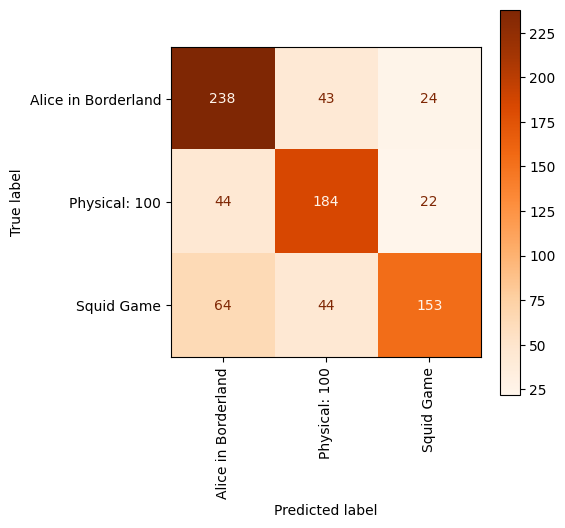

In [ ]:
cm_stem = confusion_matrix(y_test, predictions_stem)

# Plot the confusion matrix
disp_stem = ConfusionMatrixDisplay(confusion_matrix=cm_stem, display_labels=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_stem.plot(ax=ax, cmap=plt.cm.Oranges, xticks_rotation='vertical')
plt.show()


In [ ]:
svm_stem_report = classification_report(y_test, predictions_stem, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

print("SVM Report for Stemmering \n\n", svm_stem_report)

SVM Report for Stemmering 

                      precision    recall  f1-score   support

Alice in Borderland       0.69      0.78      0.73       305
      Physical: 100       0.68      0.74      0.71       250
         Squid Game       0.77      0.59      0.67       261

           accuracy                           0.70       816
          macro avg       0.71      0.70      0.70       816
       weighted avg       0.71      0.70      0.70       816



In [ ]:
df.head()

,neg,neu,pos,compound,headline,label,show_title,cleaned_text_stemmer,cleaned_text_lemma
0,0.531,0.469,0.000,-0.5267,This show is stupid,-1,physical100,show stupid,show stupid
1,0.000,1.000,0.000,0.0000,Subplot in Squidgame,0,squidgame,subplot,subplot squidgame
2,0.000,0.806,0.194,0.6478,The aim of the show should change to finding t...,1,physical100,aim show chang find perfect mind see almost fi...,"aim show change finding perfect mind , seeing ..."
3,0.000,1.000,0.000,0.0000,Jang Seongmin (rugby dude) in HDYP EP.108 [ENG],0,physical100,dude,jang seongmin rugby dude ) hdyp ep . [ eng
4,0.000,1.000,0.000,0.0000,Squid game,0,squidgame,squid,squid


In [ ]:
x=df['cleaned_text_lemma']
y=df['show_title']

In [ ]:
print(x)
print("x"*30)
print( y)

0                                             show stupid
1                                       subplot squidgame
2       aim show change finding perfect mind , seeing ...
3              jang seongmin rugby dude ) hdyp ep . [ eng
4                                                   squid
                              ...                        
2715    think ’ missing reason/meaning behind chapter ...
2716                 quest result team ordered best worst
2717                                       ♦️ survey race
2718                                        cha hyunseung
2719                                   stepping tile poll
Name: cleaned_text_lemma, Length: 2720, dtype: object
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0             physical100
1               squidgame
2             physical100
3             physical100
4               squidgame
              ...        
2715    aliceinborderland
2716          physical100
2717    aliceinborderland
2718          physical100
2719          phy

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
svm=SVC()
pipeline_lem = Pipeline([('tfidf', TfidfVectorizer()),
                           ('clf', svm),
                          ])

In [ ]:
pipeline_lem.fit(x_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [ ]:
predictions_lem =pipeline_stem.predict(x_test)

In [ ]:
print ("Accuracy Score for Stemming is: ", accuracy_score(y_test, predictions_stem))


Accuracy Score for Stemming is:  0.7046568627450981


In [ ]:
y_test.value_counts()

,count
show_title,
aliceinborderland,305
squidgame,261
physical100,250


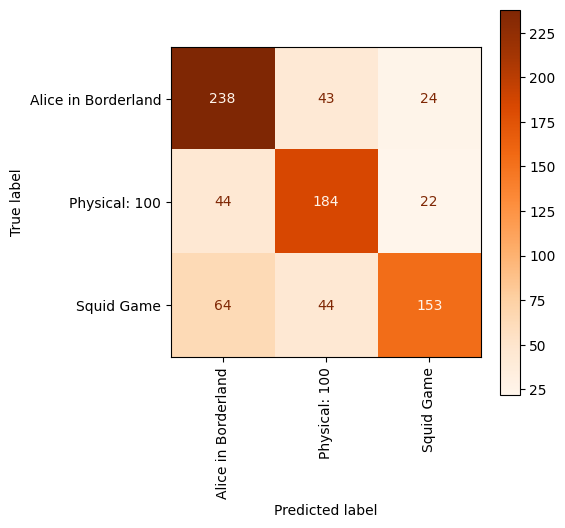

In [ ]:
cm_lem = confusion_matrix(y_test, predictions_lem)

# Plot the confusion matrix
disp_lem = ConfusionMatrixDisplay(confusion_matrix=cm_stem, display_labels=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_lem.plot(ax=ax, cmap=plt.cm.Oranges, xticks_rotation='vertical')
plt.show()


From the Confusion matrix, Squid game has the most misclassified as Alice in Borderland. This is not surprising as both shared very similar storyline and show format. Alice in Borderland has higher recall because the main differential topic of poker cards. Thus it is very likely that any mention of poker cards will be correctly classified in Alice in Borderland.

In [ ]:
svm_stem_report = classification_report(y_test, predictions_stem, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

print("SVM Report for Stemmering \n\n", svm_stem_report)

SVM Report for Stemmering 

                      precision    recall  f1-score   support

Alice in Borderland       0.69      0.78      0.73       305
      Physical: 100       0.68      0.74      0.71       250
         Squid Game       0.77      0.59      0.67       261

           accuracy                           0.70       816
          macro avg       0.71      0.70      0.70       816
       weighted avg       0.71      0.70      0.70       816



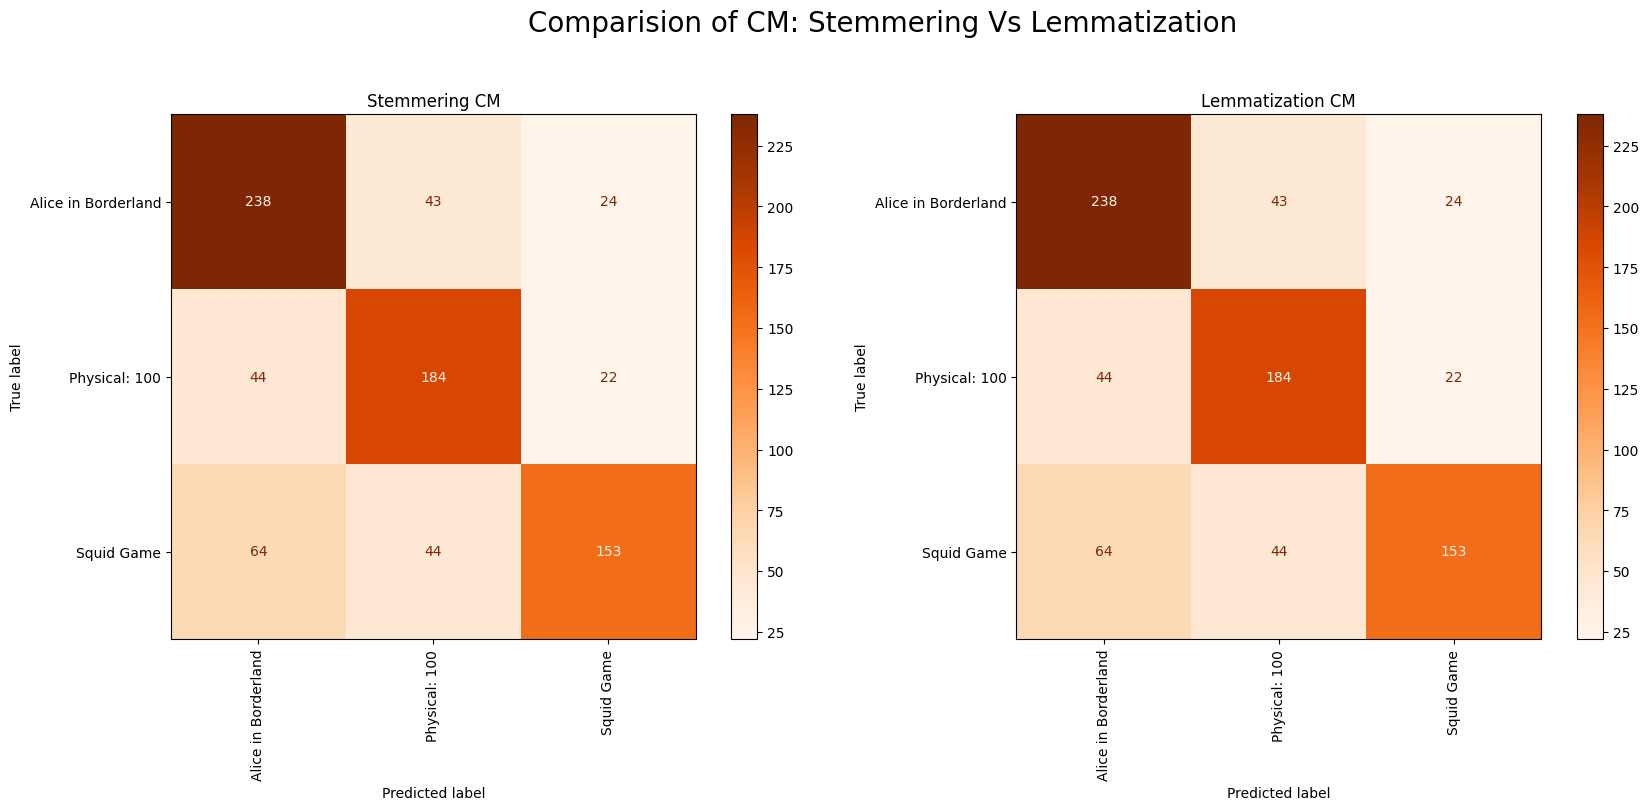

In [ ]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
disp_stem.plot(ax=ax1, cmap=plt.cm.Oranges, xticks_rotation='vertical')
disp_lem.plot(ax=ax2, cmap=plt.cm.Oranges, xticks_rotation='vertical')
ax1.set_title('Stemmering CM')
ax2.set_title('Lemmatization CM')
plt.suptitle("Comparision of CM: Stemmering Vs Lemmatization", fontsize=20, y=0.95)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
print(pipeline_lem.get_params().keys())


dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'clf__C', 'clf__break_ties', 'clf__cache_size', 'clf__class_weight', 'clf__coef0', 'clf__decision_function_shape', 'clf__degree', 'clf__gamma', 'clf__kernel', 'clf__max_iter', 'clf__probability', 'clf__random_state', 'clf__shrinking', 'clf__tol', 'clf__verbose'])


In [ ]:
# Define the hyperparameters to tune
param_grid = {'clf__C': [0.1, 1, 10, 100, 250, 500, 750, 1000],
              'clf__kernel': ['linear', 'rbf'],
              'clf__gamma': [10, 1, 0.8, 0.5, 0.2, 0.09],
              'tfidf__max_df': [0.01, 0.05, 0.1, 0.25, 0.5, 1],
              'tfidf__max_features': [500, 1000, 5000, 10000],
              'tfidf__ngram_range': [(1,1), (1,2), (1,3)]
             }

# Define the GridSearchCV object
grid_search = GridSearchCV(pipeline_lem, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'clf__C': 1, 'clf__gamma': 0.5, 'clf__kernel': 'rbf', 'tfidf__max_df': 0.25, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2)}
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.25, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf', SVC(C=1, gamma=0.5))])


In [ ]:
pipeline_lemma_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.2, ngram_range=(1, 3),
                                                                 max_features = 5000, sublinear_tf=True)),
                                       ('clf', SVC(C=5, gamma=0.8))
                                      ])

In [ ]:
pipeline_lemma_tuned.fit(x_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=5000,
                                 ngram_range=(1, 3), sublinear_tf=True)),
                ('clf', SVC(C=5, gamma=0.8))])

In [ ]:
predictions_lemma_tuned = pipeline_lemma_tuned.predict(x_test)

print ("Accuracy Score for Tuned Lemmatization is: ", accuracy_score(y_test, predictions_lemma_tuned))

Accuracy Score for Tuned Lemmatization is:  0.7794117647058824


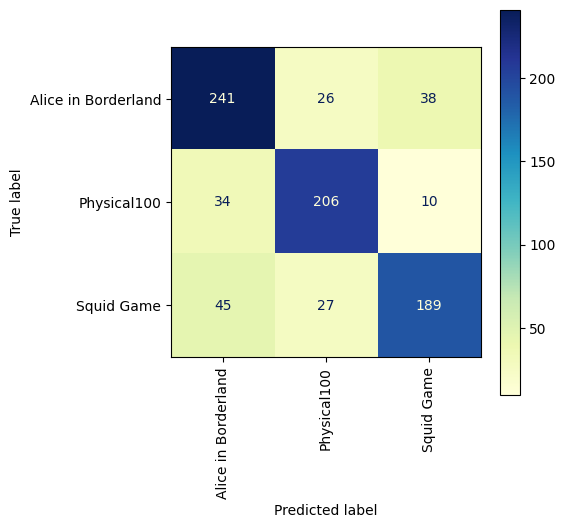

In [ ]:
cm_tuned_lemma = confusion_matrix(y_test, predictions_lemma_tuned)

# Plot the confusion matrix
disp_tuned_lemma = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lemma, display_labels=['Alice in Borderland', 'Physical100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_tuned_lemma.plot(ax=ax, cmap=plt.cm.YlGnBu, xticks_rotation='vertical')
plt.show()

In [ ]:
svm_tuned_lemma_report = classification_report(y_test, predictions_lemma_tuned, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

print("SVM Report for Lemmatization with Hyperparameter Tuning \n\n", svm_tuned_lemma_report)

SVM Report for Lemmatization with Hyperparameter Tuning 

                      precision    recall  f1-score   support

Alice in Borderland       0.75      0.79      0.77       305
      Physical: 100       0.80      0.82      0.81       250
         Squid Game       0.80      0.72      0.76       261

           accuracy                           0.78       816
          macro avg       0.78      0.78      0.78       816
       weighted avg       0.78      0.78      0.78       816



In [ ]:
X = df.loc[:, "cleaned_text_stemmer"].values
y = df.loc[:, "show_title"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
pipeline_tuned_stem = Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.2, ngram_range=(1, 3),
                                                                 max_features = 5000, sublinear_tf=True)),
                                       ('clf', SVC(C=5, gamma=0.8))
                                      ])

In [ ]:
pipeline_tuned_stem.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=5000,
                                 ngram_range=(1, 3), sublinear_tf=True)),
                ('clf', SVC(C=5, gamma=0.8))])

In [ ]:
pred_tuned_stem = pipeline_tuned_stem.predict(X_test)

accuracy_score(y_test, pred_tuned_stem)

0.7034313725490197

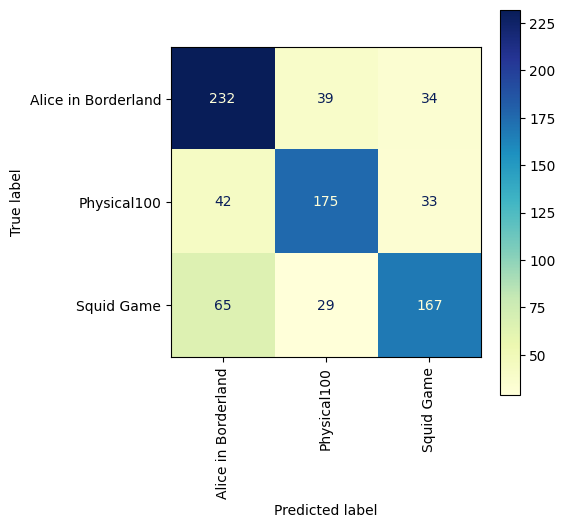

In [ ]:
cm_tuned_stem = confusion_matrix(y_test, pred_tuned_stem)

# Plot the confusion matrix
disp_tuned_stem = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_stem, display_labels=['Alice in Borderland', 'Physical100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_tuned_stem.plot(ax=ax, cmap=plt.cm.YlGnBu, xticks_rotation='vertical')
plt.show()

In [ ]:
tuned_stem_svm_report = classification_report(y_test, pred_tuned_stem, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])
print (tuned_stem_svm_report)

                     precision    recall  f1-score   support

Alice in Borderland       0.68      0.76      0.72       305
      Physical: 100       0.72      0.70      0.71       250
         Squid Game       0.71      0.64      0.67       261

           accuracy                           0.70       816
          macro avg       0.71      0.70      0.70       816
       weighted avg       0.70      0.70      0.70       816



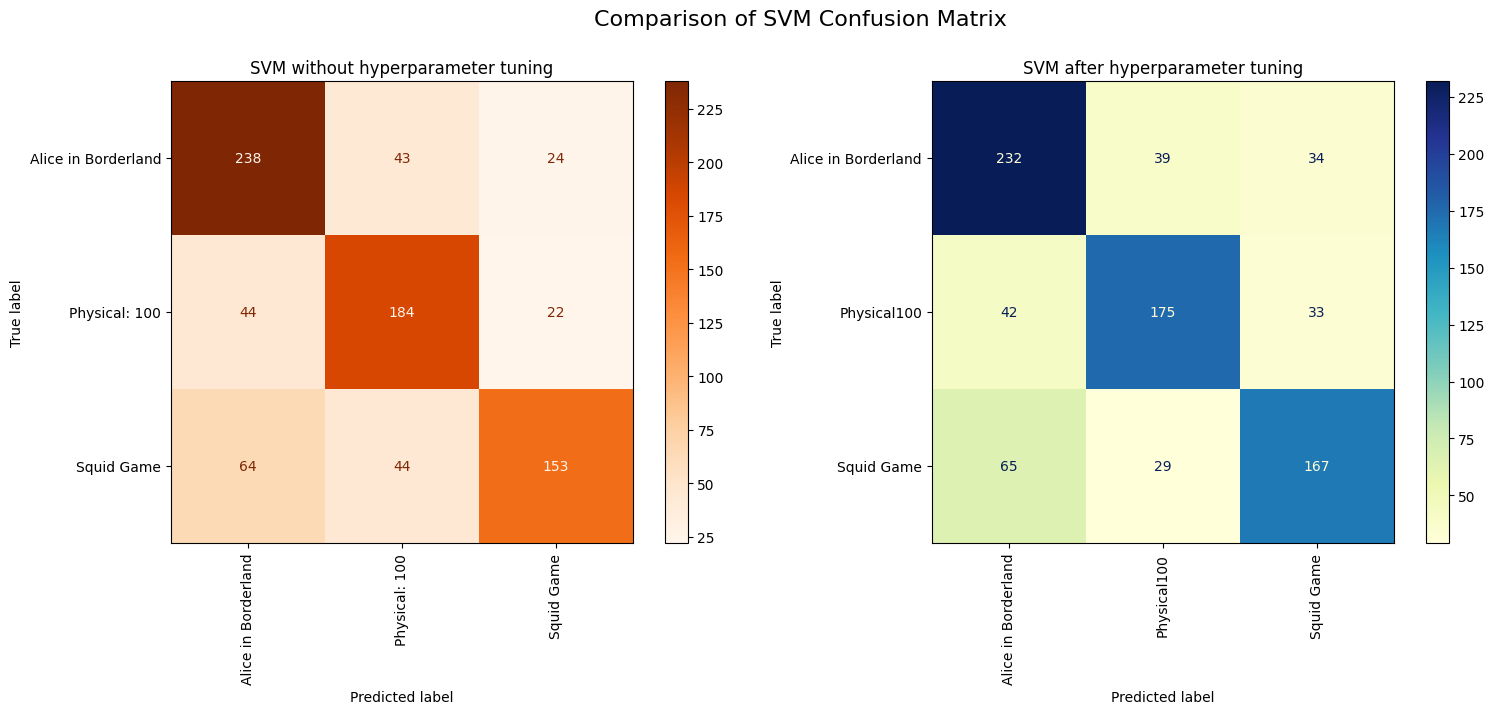

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stem, display_labels=['Alice in Borderland', 'Physical: 100', 'Squid Game'])
disp.plot(ax=axs[0], cmap=plt.cm.Oranges, xticks_rotation='vertical')
axs[0].set_title('SVM without hyperparameter tuning')

# Plot the second confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_stem, display_labels=['Alice in Borderland', 'Physical100', 'Squid Game'])
disp.plot(ax=axs[1], cmap=plt.cm.YlGnBu, xticks_rotation='vertical')
axs[1].set_title('SVM after hyperparameter tuning')

# Add the main title
fig.suptitle('Comparison of SVM Confusion Matrix', fontsize=16, y=1)

plt.show()

Hyperparameter tuning doesn't not change much from the actual modelling. As such, I will use the default params for my text classification modelling.

# f f

In [ ]:
df

,neg,neu,pos,compound,headline,label,show_title,cleaned_text_stemmer,cleaned_text_lemma
0,0.000,1.000,0.000,0.0000,Do you think Netflix should live-action Alice ...,0,aliceinborderland,think borderland retri,think netflix live-action alice borderland retry
1,0.000,1.000,0.000,0.0000,Quest 4 “obstacle course”,0,physical100,quest obstacl cours,quest “ obstacle course ”
2,0.389,0.611,0.000,-0.7906,The night fight in squid game may showed us ho...,-1,squidgame,night fight squid game may us evil,night fight squid game may showed u evil human
3,0.000,0.545,0.455,0.3612,Shows like Physical: 100?,1,physical100,like physic,show like physical
4,0.000,1.000,0.000,0.0000,I ordered a cocktail called Squid Game and exp...,0,squidgame,order cocktail squid game regular drink,ordered cocktail called squid game expected re...
...,...,...,...,...,...,...,...,...,...
2715,0.000,0.775,0.225,0.4939,Can you tell me what characters are inspired b...,1,aliceinborderland,tell inspir wonderland,tell character inspired alice wonderland
2716,0.000,1.000,0.000,0.0000,What if The Duffer Brothers adapted the AIB ma...,0,aliceinborderland,duffer manga,duffer brother adapted aib manga
2717,0.225,0.775,0.000,-0.7263,Did this moment between Nam Kyungjin and Park ...,-1,physical100,moment nam park scare crap anyon els thought g...,moment nam kyungjin park jungho scare crap any...
2718,0.000,1.000,0.000,0.0000,Game Idea: [7♧] Organization,0,aliceinborderland,game idea organ,game idea [ ♧ ] organization


In [ ]:
max_len = 0

for headline in df['headline']:
    length = len(headline.split())  # Count number of words in the headline
    if length > max_len:
        max_len = length

In [ ]:
max_len

61

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data
x = df['headline'].astype(str)  # Convert to string if needed
y = df['show_title']            # Assuming this is categorical

# Step 2: Tokenization
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size to 5000 most frequent words
tokenizer.fit_on_texts(x)
x_seq = tokenizer.texts_to_sequences(x)

# Step 3: Padding sequences
max_len = max(len(seq) for seq in x_seq)  # You can also choose a fixed length, e.g., max_len = 100
x_padded = pad_sequences(x_seq, maxlen=max_len, padding='post')

# Step 4: Encode labels (if not already numeric)
y_encoded = pd.factorize(y)[0]  # Convert categorical labels to integers
y_categorical = to_categorical(y_encoded)  # One-hot encode the labels

# Step 5: Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_categorical, test_size=0.3, random_state=42)

# Output shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (1904, 63)
y_train shape: (1904, 3)


In [ ]:
all_words = set()

# المرور على كل السجلات في عمود 'headline'
for text in df['headline']:
    words = text.split()  # تقسيم النصوص إلى كلمات
    all_words.update(words)

In [ ]:
VOCAB_SIZE=len(all_words)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3333 - loss: 0.6543 - val_accuracy: 0.3018 - val_loss: 0.6354
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3281 - loss: 0.6385 - val_accuracy: 0.3018 - val_loss: 0.6315
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3524 - loss: 0.6384 - val_accuracy: 0.4357 - val_loss: 0.6248
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3777 - loss: 0.6351 - val_accuracy: 0.3202 - val_loss: 0.6298
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4664 - loss: 0.6051 - val_accuracy: 0.4331 - val_loss: 0.6370
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5378 - loss: 0.5738 - val_accuracy: 0.4068 - val_loss: 0.6827
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5613 - loss: 0.5263 - val_accuracy: 0.3517 - val_loss: 0.6858
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6738 - loss: 0.4646 - val_accuracy: 0.4147 - val_

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4090 - loss: 0.9348
Test Loss: 0.893409252166748
Test Accuracy: 0.43995097279548645


In [ ]:
model_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model_bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history_bi = model_bi.fit(x_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 1.0000 - loss: 5.0696e-04 - val_accuracy: 0.6352 - val_loss: 1.0176
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 3.9238e-04 - val_accuracy: 0.6378 - val_loss: 1.0322
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 3.5488e-04 - val_accuracy: 0.6352 - val_loss: 1.0542
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 1.0000 - loss: 2.7712e-04 - val_accuracy: 0.6352 - val_loss: 1.0755
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 1.0000 - loss: 2.4202e-04 - val_accuracy: 0.6404 - val_loss: 1.0840
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 2.1699e-04 - val_accuracy: 0.6430 - val_loss: 1.0941
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 1.0000 - loss: 1.8908e-04 - val_accuracy: 0.6378 - val_loss: 1.1124
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 1.0000 - loss: 1.546

In [ ]:
test_loss, test_acc = model_bi.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6587 - loss: 1.1224
Test Loss: 1.135543942451477
Test Accuracy: 0.6531862616539001


In [ ]:
model_bi.save('model_bi.keras') # Pass the file path 'model_bi.h5' to the save method
model.save('model.keras') # Pass the file path 'model.h5' to the save method

In [ ]:
y_prd=model_bi.predict(x_test)
confusion_matrix(y_test.argmax(axis=1), y_prd.argmax(axis=1))

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


array([[189,  45,  53],
       [ 65, 163,  49],
       [ 42,  29, 181]])

In [ ]:
y_prd=model.predict(x_test)
confusion_matrix(y_test.argmax(axis=1), y_prd.argmax(axis=1))

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


array([[150,  69,  68],
       [ 95, 109,  73],
       [ 81,  71, 100]])

In [ ]:
y_prd[4].argmax(),y_test[4].argmax()

(1, 2)

In [ ]:
# بناء النموذج مع التعديلات
model_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # استخدام softmax لتصنيف متعدد الفئات
])

# تجميع النموذج باستخدام categorical_crossentropy
model_bi.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# تدريب النموذج
history_bi = model_bi.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

# تقييم النموذج
test_loss, test_acc = model_bi.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.3382 - loss: 1.1180 - val_accuracy: 0.4042 - val_loss: 1.0563
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6329 - loss: 0.8372 - val_accuracy: 0.5617 - val_loss: 0.9689
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8924 - loss: 0.3047 - val_accuracy: 0.5801 - val_loss: 1.1448
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9864 - loss: 0.0545 - val_accuracy: 0.5984 - val_loss: 1.3247
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9984 - loss: 0.0123 - val_accuracy: 0.5827 - val_loss: 1.4248
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.5932 - val_loss: 1.5006
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9979 - loss: 0.0070 - val_accuracy: 0.5879 - val_loss: 1.5616
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9991 - loss: 0.0068 - val_accuracy: 0.5801 -

## Pipeline Deployment and Prediction¶


In [ ]:
# Make predictions on new data
new_data = pd.DataFrame({"headlines": ["Will Gi-Hun get a happy ending in season 2?",
                                       "Sexyama Proves Age Is Just A Number During Impressive Run On Netflix",
                                       "7 Hidden Easter Eggs In Alice In Borderland That'll Make You Rewatch Despite That Heart Game",
                                       "Did anyone notice that Nam Kyung Jin looks like Taiwanese Singer Jay Chou?",
                                       "How Joker cards can be most dangerous in next season show",
                                      "Did the old man die?",
                                      "Are wrestlers better than MMA fighters?",
                                      "What happened at the beach?"]
                        })
new_data

,headlines
0,Will Gi-Hun get a happy ending in season 2?
1,Sexyama Proves Age Is Just A Number During Imp...
2,7 Hidden Easter Eggs In Alice In Borderland Th...
3,Did anyone notice that Nam Kyung Jin looks lik...
4,How Joker cards can be most dangerous in next ...
5,Did the old man die?
6,Are wrestlers better than MMA fighters?
7,What happened at the beach?


In [ ]:
#apply function to headlines column and assign it to cleaned_text_stemmer column
new_data['cleaned_text_stemmer'] = new_data['headlines'].apply(get_stem)
new_data

,headlines,cleaned_text_stemmer
0,Will Gi-Hun get a happy ending in season 2?,get happi end season
1,Sexyama Proves Age Is Just A Number During Imp...,age number impress run
2,7 Hidden Easter Eggs In Alice In Borderland Th...,hidden easter borderland make despit heart
3,Did anyone notice that Nam Kyung Jin looks lik...,anyon notic nam like singer jay
4,How Joker cards can be most dangerous in next ...,joker danger next season show
5,Did the old man die?,old man die
6,Are wrestlers better than MMA fighters?,better
7,What happened at the beach?,beach


In [ ]:
pipeline_stem = Pipeline([('tfidf', TfidfVectorizer()),
                           ('clf', svm),
                          ])

# Fitting the pipeline for prediction
pipeline_stem.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [ ]:
# Extract the vocabulary and feature weights from the trained TfidfVectorizer
tfidf_vectorizer = pipeline_tuned_stem.named_steps['tfidf']
vocab = tfidf_vectorizer.vocabulary_
feature_weights = tfidf_vectorizer.idf_

In [ ]:
#get predictions
predictions = pipeline_stem .predict(new_data["cleaned_text_stemmer"])

# Print the predicted show_title for each sentence
for sentence, prediction in zip(new_data["headlines"], predictions):
    print(f"Sentence: {sentence}\nPrediction: {prediction}\n")

Sentence: Will Gi-Hun get a happy ending in season 2?
Prediction: aliceinborderland

Sentence: Sexyama Proves Age Is Just A Number During Impressive Run On Netflix
Prediction: physical100

Sentence: 7 Hidden Easter Eggs In Alice In Borderland That'll Make You Rewatch Despite That Heart Game
Prediction: aliceinborderland

Sentence: Did anyone notice that Nam Kyung Jin looks like Taiwanese Singer Jay Chou?
Prediction: physical100

Sentence: How Joker cards can be most dangerous in next season show
Prediction: aliceinborderland

Sentence: Did the old man die?
Prediction: squidgame

Sentence: Are wrestlers better than MMA fighters?
Prediction: aliceinborderland

Sentence: What happened at the beach?
Prediction: aliceinborderland

